In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import modules.beautySurveyImage as bsi
import modules.participant
import modules.userstudy
import seaborn as sns
import modules.sharedVariables as sv
from copy import deepcopy
from scipy import stats
import tqdm
import random
import math
import rpy2
from collections import Counter
from sklearn.mixture import GaussianMixture

Loaded allAttributesMedians_df
Loaded orderedMedianRatingsBeautified_df
Loaded orderedMedianRatingsOriginal_df
Loaded pairedMedians_df
Loaded onlyParticipantInfo_df
Loaded original_data_rescaled_numeric
Loaded beautified_data_rescaled_numeric


In [2]:
df = deepcopy(sv.pairedMedians_df)

In [3]:
len(df[df["perceived_attractiveness_original"] >= 5]), len(df[df["perceived_attractiveness_beautified"] >= 5]), len(df)

(79, 347, 462)

In [4]:
df["perceived_attractiveness_original"].var(), df["perceived_attractiveness_beautified"].var()
df["perceived_attractiveness_original"].mean(), df["perceived_attractiveness_beautified"].mean()

(3.5735930735930737, 5.009740259740259)

In [5]:
sns.set_theme(style="whitegrid")

Figure 2: Comparision between attractiveness in the PRI and POST set and the correlation between attractiveness and the delta attractiveness

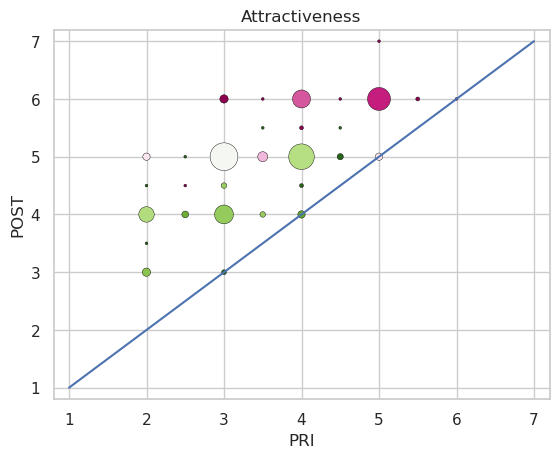

<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv(sv.storePath + "/pairedMedians_df.csv")
increaseFontSize = False
scalingFactor = 4
for attr in sv.attributeList:
    count_data_withoutGender = df.groupby(['%s_original'%(attr), '%s_beautified'%(attr)]).size().reset_index(name='count')
    count_data_withGender = df.groupby(['%s_original'%(attr), '%s_beautified'%(attr),"imageGender"]).size().reset_index(name='count')
    count_data_withoutGender["fractionFemale"] = 0.0

    for idx,row in count_data_withoutGender.iterrows():
        origVal = row["%s_original"%(attr)]
        beautVal = row["%s_beautified"%(attr)]
        sub_df = count_data_withGender[(count_data_withGender["%s_original"%(attr)] == origVal) & (count_data_withGender["%s_beautified"%(attr)] == beautVal)]
        
        try:
            femaleCount = float(sub_df[sub_df["imageGender"] == "female"]["count"])
        except:
            femaleCount = 0
        try:
            maleCount = float(sub_df[sub_df["imageGender"] == "male"]["count"])
        except:
            maleCount = 0

        count_data_withoutGender.loc[idx,"fractionMale"] = maleCount/(femaleCount + maleCount)

    count_data_withoutGender

    origVals = count_data_withoutGender["%s_original"%(attr)]
    beautVals = count_data_withoutGender["%s_beautified"%(attr)]
    countVals = count_data_withoutGender["count"]*scalingFactor
    fractionMale = count_data_withoutGender["fractionMale"]

    plt.scatter(origVals,beautVals,c=fractionMale,s=countVals,vmin=0,vmax=1,cmap="PiYG",edgecolors="black",linewidths=0.3)

    plt.xlim(0.8,7.2)
    plt.ylim(0.8,7.2)
    plt.plot(range(1,8),range(1,8))
    plt.xlabel("PRI")
    if increaseFontSize:
        plt.xlabel("PRI",fontsize=16)
    plt.ylabel("POST")
    if increaseFontSize:
        plt.ylabel("POST",fontsize=16)
    plt.title(attr.split("_")[-1].title())
    if increaseFontSize:
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    # plt.legend(False)
    savePath = sv.figureBasePath + "/priPostScatterPlots"
    plt.savefig(savePath + "/%s.png"%(attr),bbox_inches="tight")
    plt.show()
    plt.clf()
    break



Figure 2b: Correlation between attractiveness and the delta attractiveness

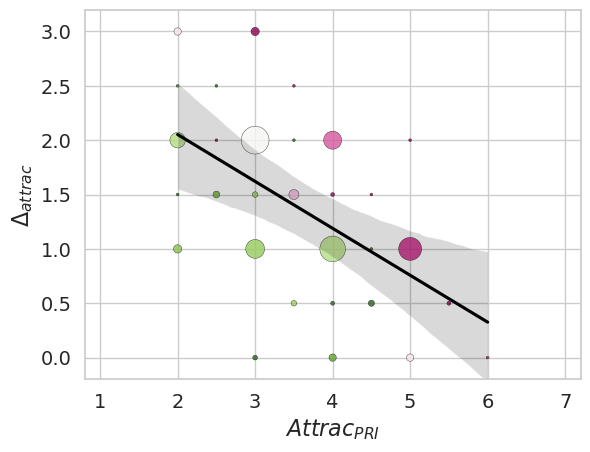

<Figure size 640x480 with 0 Axes>

In [7]:
df_beaut = deepcopy(sv.orderedMedianRatingsBeautified_df)
df_orig = deepcopy(sv.orderedMedianRatingsOriginal_df)

final_df = deepcopy(df_orig[["imageTag","perceived_attractiveness","imageGender"]])
final_df = final_df.rename(columns={"perceived_attractiveness":"originalAttractiveness"})

final_df["increaseInAttractiveness"] = df_beaut["perceived_attractiveness"] - df_orig["perceived_attractiveness"]

count_data_withGender = final_df.groupby(['originalAttractiveness', 'increaseInAttractiveness',"imageGender"]).size().reset_index(name='count')
count_data_withoutGender = final_df.groupby(['originalAttractiveness', 'increaseInAttractiveness']).size().reset_index(name='count')
count_data_withoutGender["fractionMale"] = 0.0

for idx,row in count_data_withoutGender.iterrows():
    origVal = row["originalAttractiveness"]
    increaseVal = row["increaseInAttractiveness"]
    sub_df = count_data_withGender[(count_data_withGender["originalAttractiveness"] == origVal) & (count_data_withGender["increaseInAttractiveness"] == increaseVal)]
    
    try:
        femaleCount = float(sub_df[sub_df["imageGender"] == "female"]["count"])
    except:
        femaleCount = 0
    try:
        maleCount = float(sub_df[sub_df["imageGender"] == "male"]["count"])
    except:
        maleCount = 0

    count_data_withoutGender.loc[idx,"fractionMale"] = maleCount/(femaleCount + maleCount)
count_data_withoutGender
count_data_withoutGender["count"] = count_data_withoutGender["count"]*scalingFactor

g = sns.regplot(x='originalAttractiveness', y='increaseInAttractiveness',
                    color='black', data=count_data_withoutGender,
                    scatter_kws={'s':count_data_withoutGender['count'],
                                'c':count_data_withoutGender['fractionMale'],
                                'cmap':"PiYG",'color':None,
                                'vmin':0,'vmax':1,
                                'edgecolors':'black',
                                'linewidths':0.3})
g.set(xlim=(0.8,7.2))
g.set(ylim=(-0.2,3.2))
g.set_ylabel(r"$\Delta_{\mathit{attrac}}$",fontsize=16)
g.set_xlabel(r"$\mathit{Attrac}_{\mathit{PRI}}$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(sv.figureBasePath + "/fig2/attractivenessVsIncreaseInAttractiveness.png",bbox_inches="tight")
plt.show()
plt.clf()


Figure 3: Violin plots depicting the impact of age, gender and ethnicity on the perceptions of attractiveness

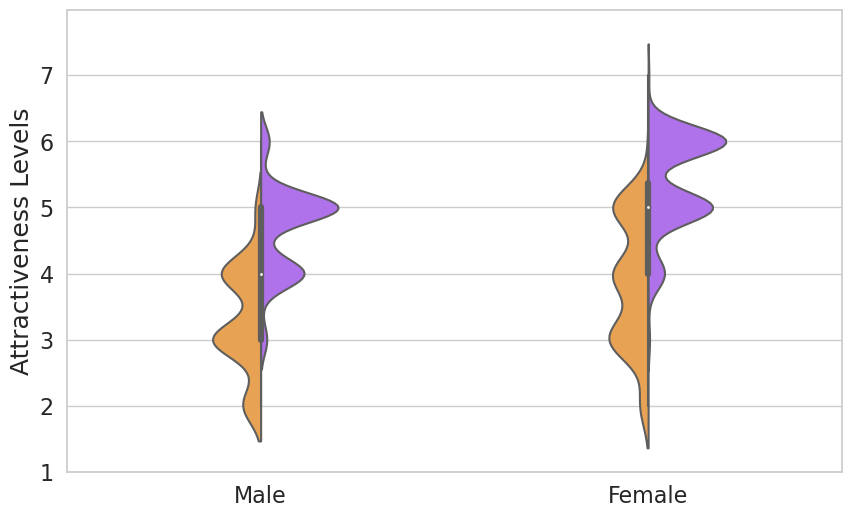

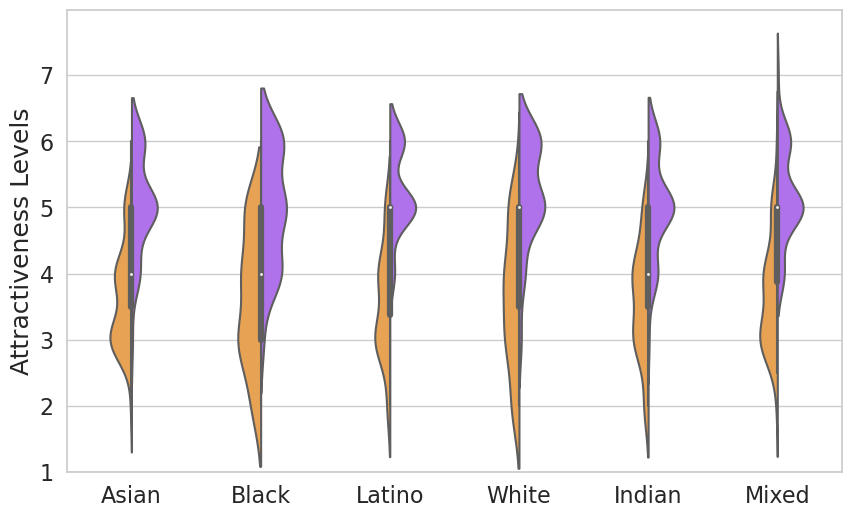

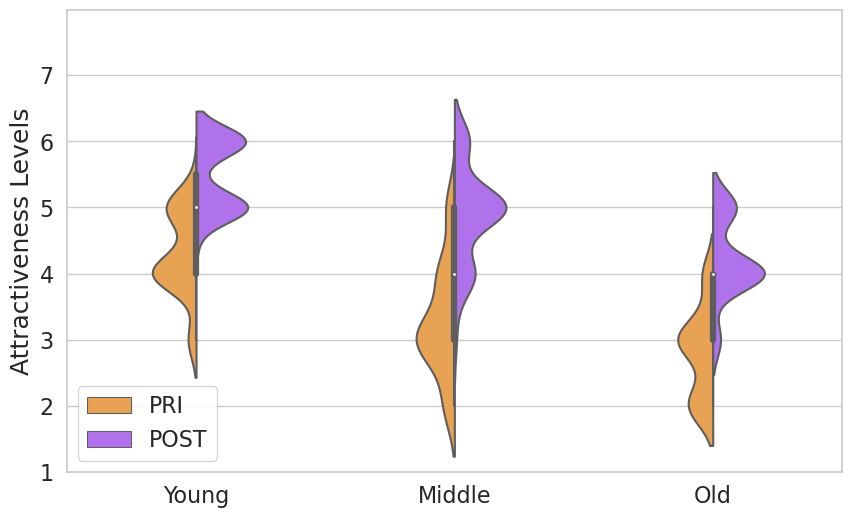

In [8]:
df = deepcopy(sv.allAttributesMedians_df)
savePath = sv.figureBasePath + "/fig3ViolinPlots"

plt.figure(figsize = (10,6))
orderList = ["male","female"]
g = sns.violinplot(x="imageGender",y="perceived_attractiveness",hue="beautification",
                    data=df,palette=sv.beautificationPaletteDict,hue_order=["original","beautified"],order=orderList,
                    split=True,width=0.4)#,ax = ax[1])
g.set(ylim=(1,7.99),xticklabels=[x.title() for x in orderList])
g.set_xlabel("",fontsize=18)
g.tick_params(axis='x', labelsize=16)
g.set_ylabel("Attractiveness Levels",fontsize=18)
g.tick_params(axis='y', labelsize=16)
handles, labels = g.get_legend_handles_labels()
plt.legend(handles,["PRI","POST"],loc='upper right',fontsize=16,title_fontsize=16)
g.get_legend().set_visible(False)
plt.savefig(savePath + "/gender.png",bbox_inches="tight")

plt.figure(figsize = (10,6))
orderList = ["asian","black","latino","white","indian","mixed"]
cfd_df = df[df["dataset"]=="cfd"]
g = sns.violinplot(x="condition",y="perceived_attractiveness",hue="beautification",
                    data=cfd_df,palette=sv.beautificationPaletteDict,hue_order=["original","beautified"],order=orderList,
                    split=True,width=0.4)#,ax = ax[2])
g.set(ylim=(1,7.99),xticklabels=[x.title() for x in orderList])
g.set_xlabel("",fontsize=18)
g.tick_params(axis='x', labelsize=16)
g.set_ylabel("Attractiveness Levels",fontsize=18)
g.tick_params(axis='y', labelsize=16)
handles, labels = g.get_legend_handles_labels()
plt.legend(handles,["PRI","POST"],loc='upper right',fontsize=16,title_fontsize=16)
g.get_legend().set_visible(False)
plt.savefig(savePath + "/ethnicity.png",bbox_inches="tight")

plt.figure(figsize = (10,6))
orderList = ["young","middle","old"]
faces_df = df[df["dataset"]=="faces"]
g = sns.violinplot(x="condition",y="perceived_attractiveness",hue="beautification",
                    data=faces_df,palette=sv.beautificationPaletteDict,hue_order=["original","beautified"],order=orderList,
                    split=True,width=0.4)#,ax = ax[0])
g.set(ylim=(1,7.99),xticklabels=[x.title() for x in orderList])
g.set_xlabel("",fontsize=18)
g.tick_params(axis='x', labelsize=16)
g.set_ylabel("Attractiveness Levels",fontsize=18)
g.tick_params(axis='y', labelsize=16)
handles, labels = g.get_legend_handles_labels()
g.legend(handles,["PRI","POST"],loc='lower left',fontsize=16,title_fontsize=16)
plt.savefig(savePath + "/age.png",bbox_inches="tight")

New scales from the OSM. Computed in R, hard-coded into the sv file and then plotted here

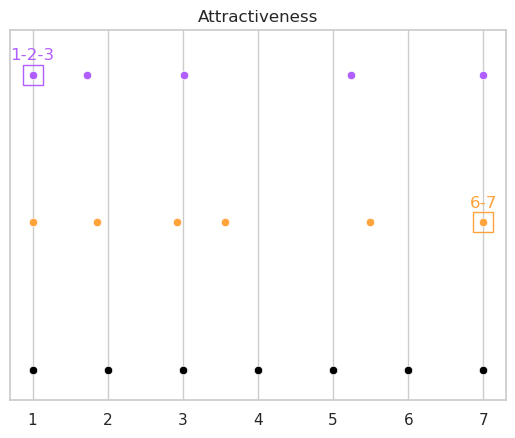

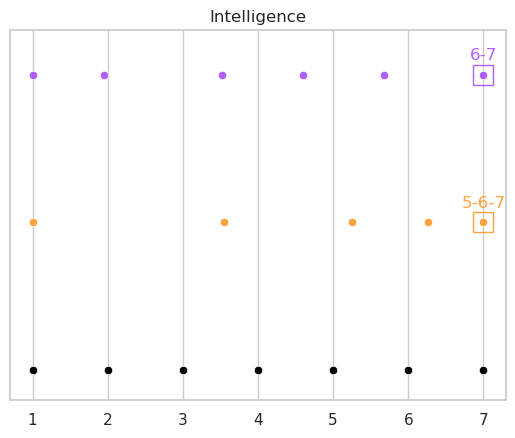

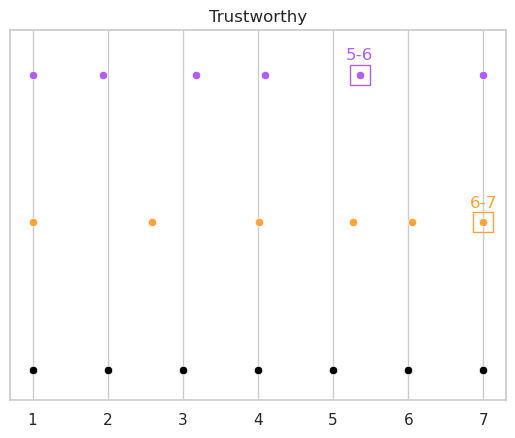

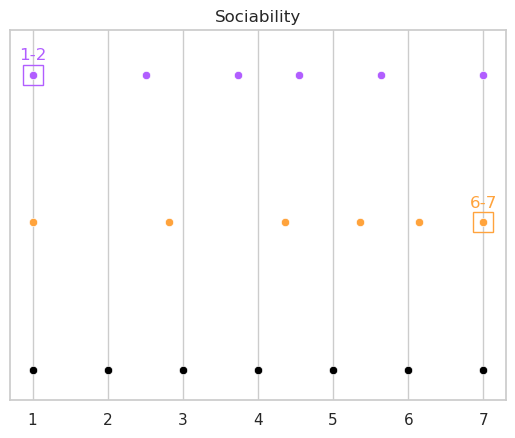

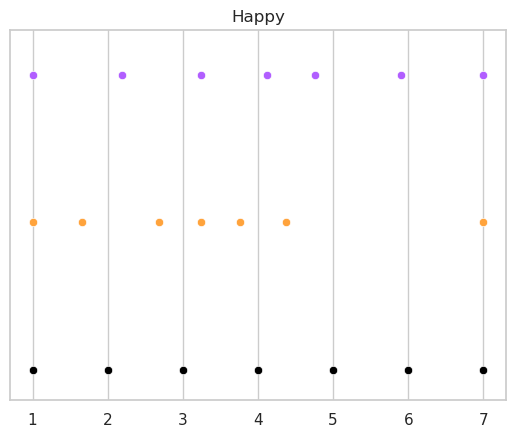

<Figure size 640x480 with 0 Axes>

In [9]:
savePath = sv.figureBasePath + "/newOSMScales"

baseline = [i for i in range(1,8)]
labelDict = {"beautified":"POST","original":"PRI"}

titleDict = {}
for attr in sv.attributeList:
    titleDict[attr] = attr.title()
titleDict["perceived_attractiveness"] = "Attractiveness"

saveImages = True
largeFontSize = False
spreadOver7Points = True
withoutYLabels = True

for attr in sv.attributeList:
    sns.scatterplot(x=baseline,y=[1 for i in range(len(baseline))],color="black")
    for yNum, beautification in enumerate(["original","beautified"]):
        l = sv.newPhisDict_numeric[beautification][attr]
        N = len(l)
        multiplier = N
        if spreadOver7Points:
            multiplier = 7
        rescaledList = list(map(lambda phi: (multiplier-1)*phi + 1, l))
        sns.scatterplot(x=rescaledList,y=[yNum+2 for i in range(N)],color=sv.beautificationPaletteDict[beautification])

        # now add the diamonds around the compressed points
        y = yNum+2
        mergePointsDict = sv.collapsePointsDict[beautification][attr]
        for x in mergePointsDict:
            xPos = rescaledList[x-1]
            color = sv.beautificationPaletteDict[beautification]
            plt.plot(xPos,y,'s',
                    markersize=15,markerfacecolor='none',markeredgecolor=color)
            if largeFontSize:
                plt.text(xPos, y+0.08, mergePointsDict[x], ha='center', va='bottom',color=color,fontsize=13)
            else:
                plt.text(xPos, y+0.08, mergePointsDict[x], ha='center', va='bottom',color=color)


    if largeFontSize:
        plt.yticks([2,3],["PRI","POST"],fontsize=18)
        plt.xticks([i for i in range(1,8)],fontsize=16)
    else:
        plt.title(titleDict[attr])
        plt.yticks([2,3],["PRI","POST"])
        plt.xticks([i for i in range(1,8)])
    plt.ylim((0.8,3.3))
    if withoutYLabels:
        plt.yticks([])
    if saveImages:
        plt.savefig(savePath + "/%s.jpg"%(attr),bbox_inches="tight")
    plt.show()
    plt.clf()

Plotting the gender Estimated Marginal Means

In [10]:
# stat bar parameters dict: y, h and d (position of the y bar, height of the vertical bars and depth of the text)
# these were picked manually after the plots were created for the best looking figures

y_dict = {
    "original":{
        "perceived_attractiveness":-0.15,
        "intelligence":0.015,
        "trustworthy":-0.037,
        "sociability":-0.01,
        "happy":0.015
    },
    "beautified":{
        "perceived_attractiveness":-0.21,
        "intelligence":0.026,
        "trustworthy":-0.023,
        "sociability":0.01,
        "happy":0.008
    }
} 

h_dict = {
    "original":{
        "perceived_attractiveness":-0.008,
        "intelligence":0.001,
        "trustworthy":-0.001,
        "sociability":-0.001,
        "happy":0.001
    },
    "beautified":{
        "perceived_attractiveness":-0.008,
        "intelligence":0.001,
        "trustworthy":-0.001,
        "sociability":0.001,
        "happy":0.001
    }
} 

d_dict = {
    "original":{
        "perceived_attractiveness":-0.015,
        "intelligence":0,
        "trustworthy":-0.002,
        "sociability":-0.003,
        "happy":0
    },
    "beautified":{
        "perceived_attractiveness":-0.015,
        "intelligence":0,
        "trustworthy":-0.002,
        "sociability":0,
        "happy":0
    }
} 

{('male', 'female'): -0.04800283620405669, ('male', 'male'): -0.11232314178917664, ('female', 'female'): 0.0, ('female', 'male'): -0.09448827661196502}
{('male', 'female'): -0.03883439703777203, ('male', 'male'): -0.18171439825169405, ('female', 'female'): 0.0, ('female', 'male'): -0.133598011068422}


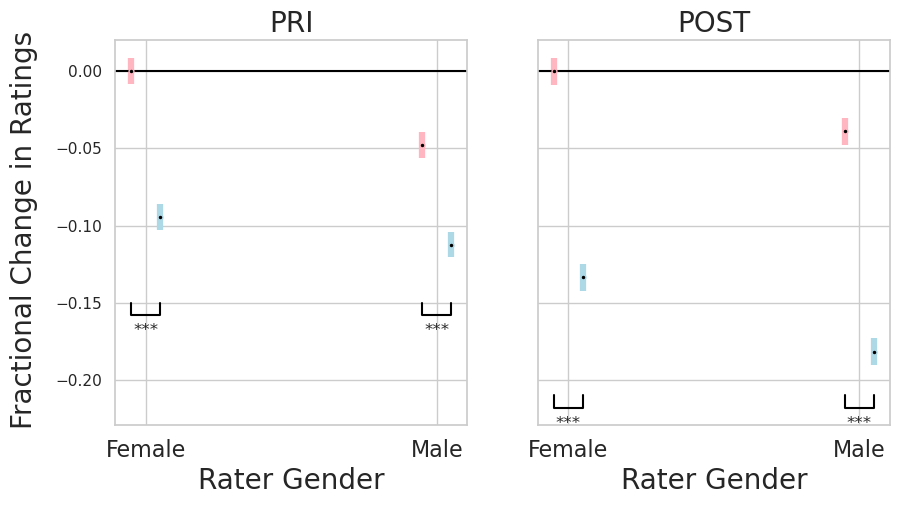

{('male', 'female'): -0.0036382013929278758, ('male', 'male'): 0.0032771054650380547, ('female', 'female'): 0.0, ('female', 'male'): 0.008531701836353989}
{('male', 'female'): -0.012561694744641638, ('male', 'male'): 0.012289191098838378, ('female', 'female'): 0.0, ('female', 'male'): 0.018400672817818247}


<Figure size 640x480 with 0 Axes>

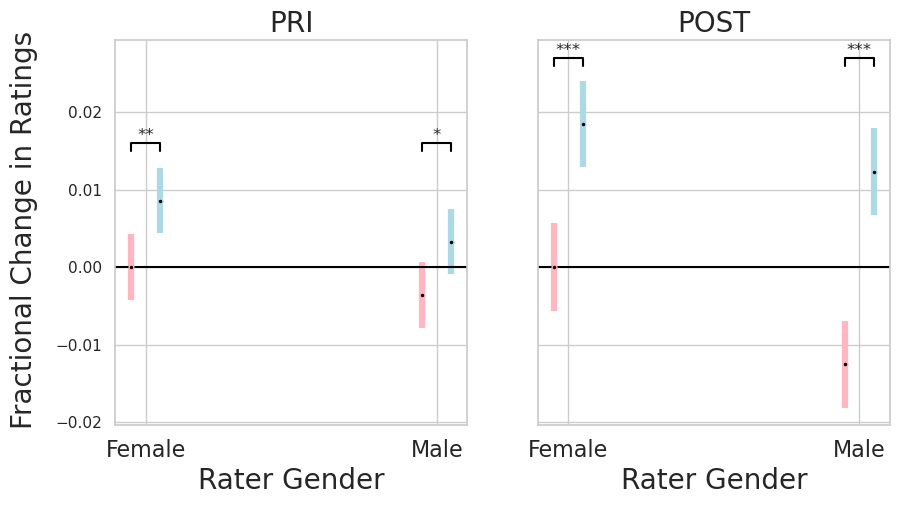

{('male', 'female'): -0.003391875786353212, ('male', 'male'): -0.027787161597123244, ('female', 'female'): 0.0, ('female', 'male'): -0.01819328700450488}
{('male', 'female'): -0.014534743860616706, ('male', 'male'): -0.015589117050431719, ('female', 'female'): 0.0, ('female', 'male'): -0.011326404780133359}


<Figure size 640x480 with 0 Axes>

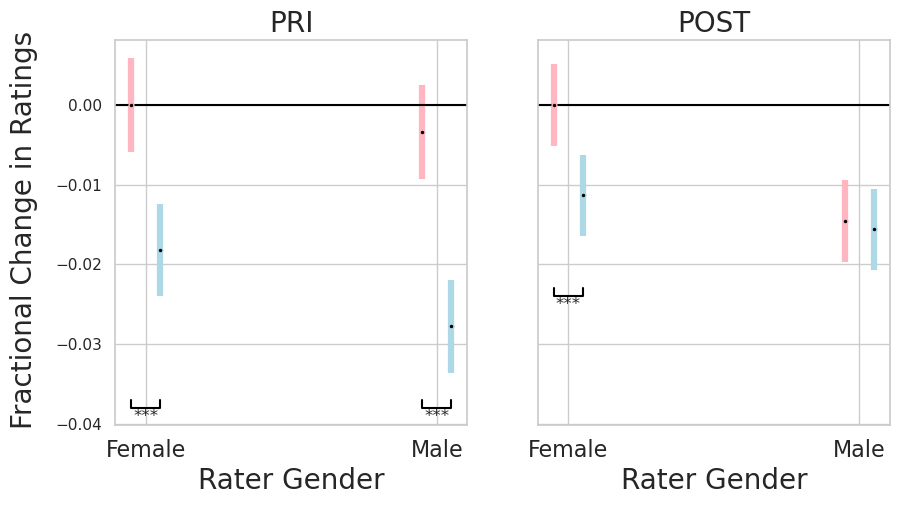

{('male', 'female'): 0.018226987083150032, ('male', 'male'): 0.0071975120267566695, ('female', 'female'): 0.0, ('female', 'male'): -0.0016314072903016452}
{('male', 'female'): -0.0023883497292832936, ('male', 'male'): -0.01888824514759498, ('female', 'female'): 0.0, ('female', 'male'): -0.027715140370676645}


<Figure size 640x480 with 0 Axes>

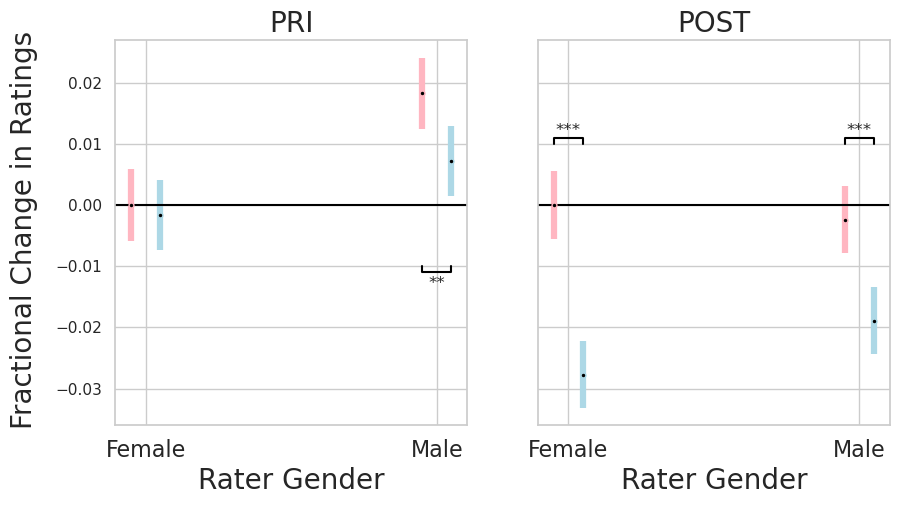

{('male', 'female'): 0.011554881950195701, ('male', 'male'): 0.016183056858408613, ('female', 'female'): 0.0, ('female', 'male'): 0.007000229770955713}
{('male', 'female'): -0.0031475583360685328, ('male', 'male'): -0.013051784775222888, ('female', 'female'): 0.0, ('female', 'male'): -0.02188875354394718}


<Figure size 640x480 with 0 Axes>

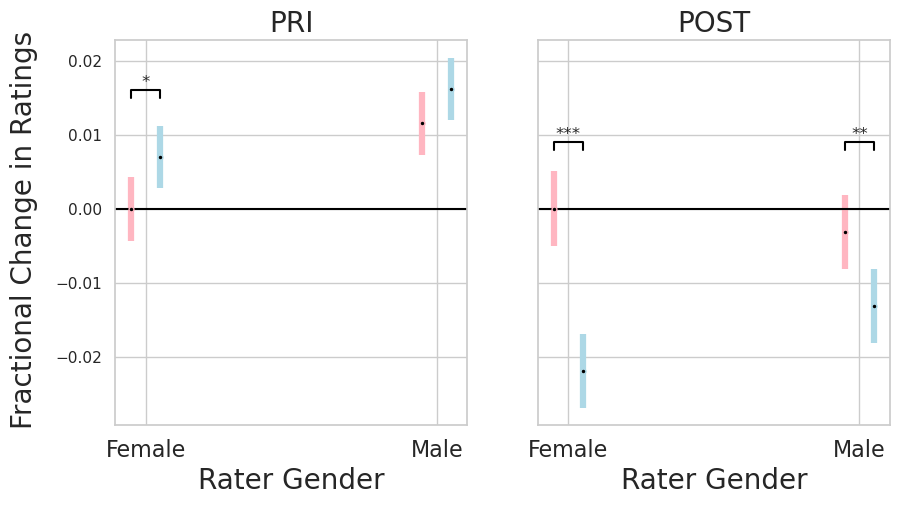

<Figure size 640x480 with 0 Axes>

In [11]:
# code to read out the emmeans files generated by R

savePath = sv.figureBasePath + "/emmeansPlots"
emmeansFilePath = sv.storePath + "/emmeansFilesFromR"

x = np.array([1,2,3,4])

MALE = "male"
FEMALE = "female"

basePosFemale = 1
basePosMale = 2
delta = 0.05

contrastStringDict = {
    "female": "female female - male female",
    "male":"female male - male male"
} # takes rater genders into account

def addStatBar(ax,raterGender,attr,beautification):
    #pull up relevant contrasts df
    contrasts_df = pd.read_csv(emmeansFilePath + "/%s_emmContrasts_%s.csv"%(attr,beautification))
    row = contrasts_df[contrasts_df["contrast"] == contrastStringDict[raterGender]]
    pVal = float(row["p.value"])
    finalString = None
    if pVal < 0.001:
        finalString = "***"
    elif pVal < 0.01:
        finalString = "**"
    elif pVal < 0.05:
        finalString = "*"
    
    basePos = basePosFemale if raterGender == "female" else basePosMale

    if finalString is not None:
        x1 = basePos - delta
        x2 = basePos + delta
        y = y_dict[beautification][attr]
        h = h_dict[beautification][attr]
        d = d_dict[beautification][attr]
        ax.plot([x1,x1,x2,x2],[y,y+h,y+h,y],color="black")
        ax.text(basePos,y+h+d,finalString,ha="center",va="bottom")

# (raterGender, imageGender)
xPositionsDict = {
    (FEMALE,FEMALE): basePosFemale - delta,
    (FEMALE,MALE): basePosFemale + delta,
    (MALE,FEMALE): basePosMale - delta,
    (MALE,MALE): basePosMale + delta
}

markerColorDict = {MALE:"#98c5d4",FEMALE:"#c18b93"}

genderColorDict = {MALE: "#ADD8E6", FEMALE: "#FFB6C1"} 
genderShapeDict = {'male': 'x', 'female': '^'}

beautificationToNameMap = {"original":"PRI","beautified":"POST"}

globalDeltaHolder = 2
imageFemaleLevel = 0

saveFigs = True
testingOneFigure = False

for attr in sv.attributeList:
    fig, ax = plt.subplots(1,2,figsize=(10,5),sharey=True)
    for idx, beautification in enumerate(["original","beautified"]):
        numLevels = sv.numLevelsDict[beautification][attr]
        xticklabels = []

        emmeans_df = pd.read_csv(emmeansFilePath + "/%s_emmeans_%s.csv"%(attr,beautification))
        
        y_means = {}
        y_error_lower = {}
        y_error_upper = {}
        spreadDict = {}

        for raterGender in [MALE,FEMALE]:
            startValue = -1
            for imageGender in [FEMALE,MALE]:
                row = emmeans_df[(emmeans_df["perceived_gender"]==imageGender) & (emmeans_df["participantSex"]==raterGender)]
                spread = (float(row["upper.CL"]) - float(row["lower.CL"]))/numLevels
                
                pair = (raterGender,imageGender)

                yVal = float(row["emmean"])
                y_means[pair] = deepcopy(yVal)
                y_error_lower[pair] = yVal - (spread/2)
                y_error_upper[pair] = yVal + (spread/2)
                spreadDict[pair] = spread/2 

        # raterGenderBasedShift = raterMaleImageFemale - raterFemaleImageFemale
        baseLineLevel = y_means[(FEMALE,FEMALE)]
        for raterGender in [MALE,FEMALE]:
            for imageGender in [FEMALE,MALE]:
                pair = (raterGender,imageGender)
                y_means[pair] = (y_means[pair] - baseLineLevel)/numLevels
        print(y_means)

        for raterGender in [MALE,FEMALE]:
            for imageGender in [MALE,FEMALE]:
                pair = (raterGender,imageGender)
                
                ax[idx].errorbar(x = [xPositionsDict[pair]],y = [y_means[pair]],
                            #yerr = [[y_error_lower[pair]],[y_error_upper[pair]]],
                            yerr=spreadDict[pair],
                            color = genderColorDict[imageGender],
                            elinewidth=4.5,
                            marker=".",markerfacecolor="black",markersize=7
                            )
    
        ax[idx].axhline(y = imageFemaleLevel, color = 'black')
        ax[idx].set_title(beautificationToNameMap[beautification],fontsize=20)
        ax[idx].set_xticks([basePosFemale,basePosMale],labels=["Female","Male"],fontsize=16)
        ax[idx].set_xlabel("Rater Gender",fontsize=20)
        addStatBar(ax[idx],"female",attr,beautification)
        addStatBar(ax[idx],"male",attr,beautification)

    fig.suptitle("%s\n"%(attr.split("_")[-1].title()),fontsize=20)
    if attr == "trustworthy":
        fig.suptitle("Trustworthiness",fontsize=20)
    fig.suptitle("")
    fig.supylabel("Fractional Change in Ratings",fontsize=20)
    if saveFigs:
        plt.savefig(savePath + "/%s.png"%(attr),bbox_inches="tight")
    
    plt.show()
    plt.clf()

    if testingOneFigure:
        break


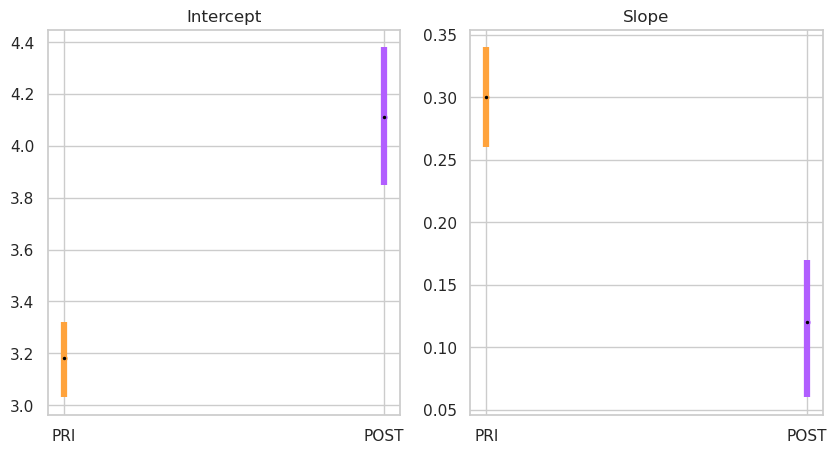

In [12]:
# plot the confints for Reviewer 3

resDict = {
    "original":{
        "b0":{
            "lower":3.03,
            "upper":3.32,
            "mean": 3.18
        },
        "b1":{
            "lower":0.26,
            "upper":0.34,
            "mean":0.30
        }
    },
    "beautified":{
        "b0":{
            "lower":3.85,
            "upper":4.38,
            "mean": 4.11
        },
        "b1":{
            "lower":0.06,
            "upper":0.17,
            "mean":0.12
        }
    }
}

adjust = 0.2
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey=False)
for idx, param in enumerate(["b0","b1"]):
    for beautification in ["original","beautified"]:
        position = 1 if beautification == "original" else 2
        centerVal = resDict[beautification][param]["mean"]
        lowerLim = resDict[beautification][param]["lower"]
        upperLim = resDict[beautification][param]["upper"]
        ax[idx].errorbar(x = [position],y = [centerVal],
                                #yerr = [[y_error_lower[pair]],[y_error_upper[pair]]],
                                yerr=[[centerVal-lowerLim],[upperLim-centerVal]],
                                color = sv.beautificationPaletteDict[beautification],
                                elinewidth=4.5,
                                marker=".",markerfacecolor="black",markersize=7
                                )
        
        # ax[idx].tick_params(
        #     axis='x',          # changes apply to the x-axis
        #     which='both',      # both major and minor ticks are affected
        #     bottom=False,      # ticks along the bottom edge are off
        #     top=False,         # ticks along the top edge are off
        #     labelbottom=False) # labels along the bottom edge are off
        title = {0:"Intercept",1:"Slope"}
    ax[idx].set_title(title[idx])
    ax[idx].set_xticks([1,2],labels=["PRI","POST"])
plt.show()

Plotting the saturation curve figures

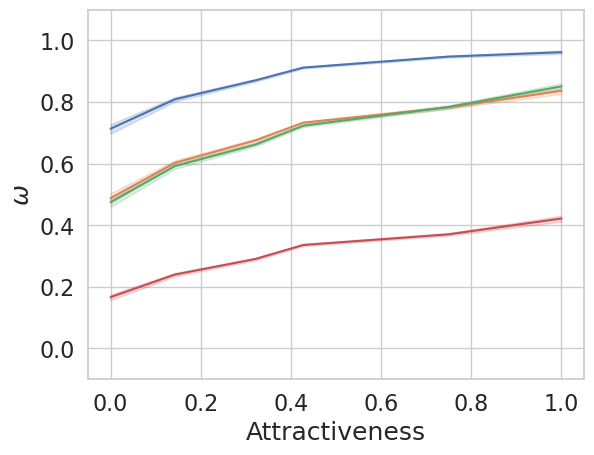

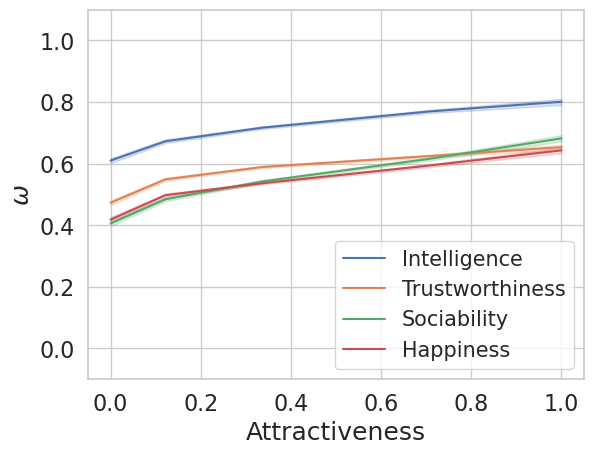

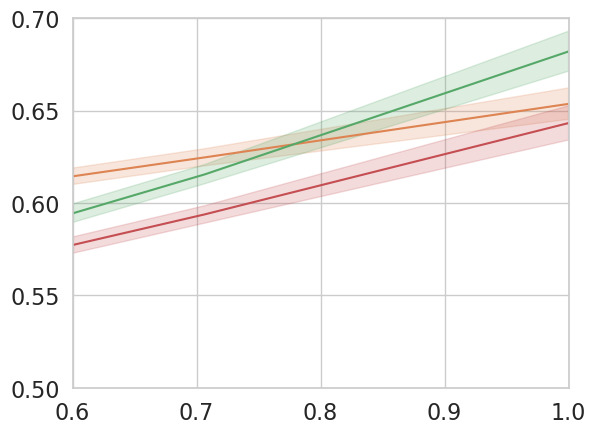

<Figure size 640x480 with 0 Axes>

In [13]:
attrListToUse = sv.attributeList[1:]

savePath = sv.figureBasePath + "/saturationCurves"

nameMappingDict ={
    'intelligence': "Intelligence", 
    'trustworthy': "Trustworthiness",
    'sociability': "Sociability",
    'happy': "Happiness"
}

beautifiedCount = 0
for beautification in ["original","beautified","beautified"]:
    if beautification == "beautified": # to also create the zoomed in plot
        beautifiedCount += 1

    rescaled_df = pd.read_csv(sv.storePath + "/%s_data_rescaled_numeric.csv"%(beautification))

    for attr in attrListToUse:
        sns.lineplot(data=rescaled_df,
                                x="perceived_attractiveness_rescaledNumeric_01",
                                y="%s_rescaledNumeric_01"%(attr),label=nameMappingDict[attr])
    
    if beautification == "original":
        plt.legend().set_visible(False)
    else:
        plt.yticks(fontsize=16)
        plt.legend(fontsize=15,loc = "lower right")
    plt.xlabel("Attractiveness",fontsize = 18)
    plt.ylabel(r"$\omega$",fontsize = 18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if beautifiedCount == 2:
        plt.ylim(0.5,0.7)
        plt.xlim(0.6,1.0)
        plt.legend().set_visible(False)
        plt.yticks([0.5,0.55,0.6,0.65,0.7],fontsize=16)
        plt.xticks([0.6,0.7,0.8,0.9,1.0],fontsize=16)
        plt.xlabel("")
        plt.ylabel("")
    else:
        plt.ylim(-0.1,1.1)
    if beautifiedCount == 2:
        plt.savefig(savePath + "/zoomedInPart.png",bbox_inches="tight")
    else:
        plt.savefig(savePath + "/%s.png"%(beautification),bbox_inches="tight")
    plt.show()
    plt.clf()



Distribution of attractiveness ratings from the appendix

Raters SRA:
Mean: 4.169213973799127
Std: 1.2122487888121252
------------
Counter({5: 912, 4: 834, 3: 426, 6: 251, 2: 230, 1: 58, 7: 37})


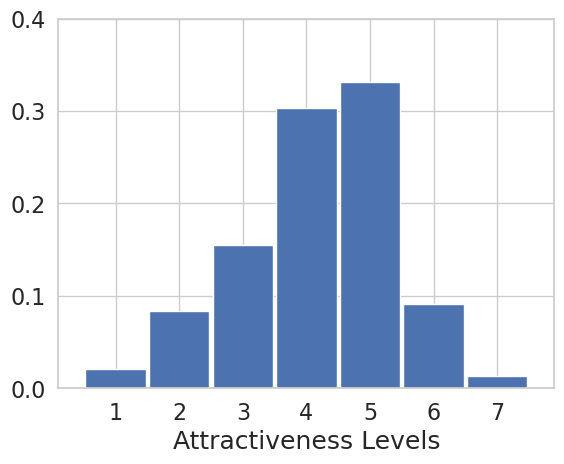

PRI centralized:
Mean: 3.5735930735930737
Std: 0.9104941756731407
------------
Counter({3.0: 170, 4.0: 157, 5.0: 83, 2.0: 49, 6.0: 3})


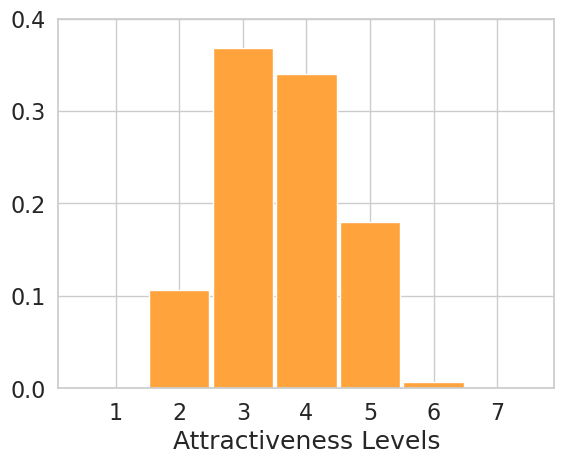

In [14]:
savePath = sv.figureBasePath + "/attractivenessDistributions"

onlyParticipantInfo_df = deepcopy(sv.onlyParticipantInfo_df)
raterSRA = onlyParticipantInfo_df["selfRatedAttractiveness"]

df = deepcopy(sv.allAttributesMedians_df)
df = df[df["beautification"] == "original"]
centralizedAttrRatings = df["perceived_attractiveness"]

# 0 is self rated attractiveness
for idx, arr in enumerate([raterSRA,centralizedAttrRatings]):
    if idx == 0:
        print("Raters SRA:")
    else:
        print("PRI centralized:")
    print("Mean:",np.mean(arr))
    print("Std:",np.std(arr))
    print("------------")
    
    countsDict = Counter(arr)
    
    if idx == 1: # merge the 0.5 parts to the upper index - round is a bankers round!
        for i in range(7):
            if i+0.5 in countsDict:
                countsDict[i+1] += countsDict.pop(i+0.5)
    print(countsDict)
    # normalize the counts dicts
    normConst = sum(countsDict.values())
    for key in countsDict.keys():
        countsDict[key] = countsDict[key]/normConst

    if idx == 0:
        g = plt.bar(countsDict.keys(),countsDict.values(),
                    width=0.95)
    else:
        g = plt.bar(countsDict.keys(),countsDict.values(),color=sv.beautificationPaletteDict["original"],
                    width=0.95)
    
    plt.xlim((0.1,7.9))
    plt.ylim((0,0.4))
    plt.yticks([0,0.1,0.2,0.3,0.4],fontsize=16)
    plt.xticks([1,2,3,4,5,6,7],fontsize=16)
    plt.xlabel("Attractiveness Levels",fontsize=18)
    if idx == 0:
        plt.savefig(savePath + "/raterSRA.png",bbox_inches="tight")
    else:
        plt.savefig(savePath + "/priCentralized.png",bbox_inches="tight")

    plt.show()

Plot all the rater characteristics that are in the appendix. Kendalls correlations were calculated in R.

N: 1 ; Log likelihood: -4.132567
[[46.47270742]]
N: 2 ; Log likelihood: -4.074601
[[33.21883259]
 [57.99094571]]
N: 3 ; Log likelihood: -4.071173
[[30.01277259]
 [62.31682147]
 [46.02342512]]
N: 4 ; Log likelihood: -4.064036
[[26.69003148]
 [54.13609653]
 [38.78598742]
 [66.46879844]]
N: 5 ; Log likelihood: -4.061957
[[26.08269468]
 [57.78628357]
 [36.77283068]
 [67.94430422]
 [48.1199967 ]]
N: 6 ; Log likelihood: -4.054268
[[23.70385825]
 [58.52725221]
 [38.68324603]
 [67.88153259]
 [49.20106391]
 [31.26461575]]
N: 7 ; Log likelihood: -4.053718
[[23.73130698]
 [54.66833267]
 [38.2914658 ]
 [70.37681528]
 [47.15764396]
 [31.2892343 ]
 [62.39853581]]
N: 8 ; Log likelihood: -4.053117
[[29.01734044]
 [55.82909829]
 [41.5116389 ]
 [71.20625045]
 [35.16035128]
 [49.23720915]
 [63.31048057]
 [22.91741298]]
N: 9 ; Log likelihood: -4.053459
[[29.01734201]
 [55.87348147]
 [41.51214542]
 [68.92978319]
 [35.16036523]
 [49.24172214]
 [62.83989031]
 [22.91741293]
 [75.67744519]]
N: 10 ; Log likelih

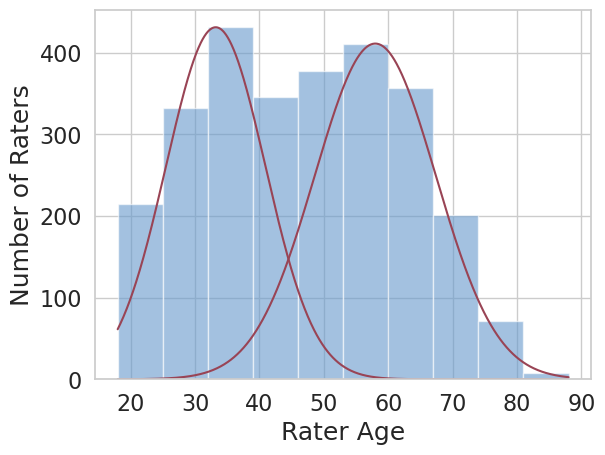

{'severalTimesADay': 1599, 'aboutOnceADay': 593, 'fewTimesAWeek': 237, 'never': 202, 'everyFewWeeks': 73, 'lessOften': 44}
0.5818777292576419
{'never': 2189, 'rarely': 295, 'sometimes': 200, 'often': 44, 'always': 20}
0.7965793304221251
['Facebook', 'Instagram', 'Tiktok', 'Snapchat', 'Other', 'DontUseSocialMedia']
Facebook: 0.3544564657393096
Instagram: 0.2780353769534604


<Figure size 640x480 with 0 Axes>

In [15]:
df = deepcopy(sv.onlyParticipantInfo_df)

savePath = sv.figureBasePath + "/raterAttributes"

colorsList = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988'] #picked from the blog by Paul Tol
ylimToUse = (0,2251)
yLabelToUse = "Number of Raters"
yAxisLabelFontSize = 18
xTickLabelsFontSize = 16
yTickLabelsFontSize = 16

for numComponents in range(1,11):
    gmm = GaussianMixture(n_components=numComponents, random_state=42)
    data = np.array(onlyParticipantInfo_df["participantAge"])
    data = data.reshape(-1,1)
    gmm.fit(data)
    print("N: %d ; Log likelihood: %f"%(numComponents,gmm.score(data)))
    print(gmm.means_)

histCol = "#6699CC"
gmm = GaussianMixture(n_components=2, random_state=42)
data = np.array(onlyParticipantInfo_df["participantAge"])
data = data.reshape(-1,1)

gmm.fit(data)

means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()

# rater age distribution
n, bins, _ = plt.hist(data,color=histCol,alpha=0.6)
print(n,bins)
x = np.linspace(data.min(), data.max(), 1000)
# plt.clf()
scalingFactor = [431/0.05179,411/0.04244] # hardcoding this by manually pulling it out to speed this up
for idx, (mean, cov) in enumerate(zip(means, covariances)):
    print(mean,cov)
    plt.plot(x, scalingFactor[idx]* 1/(np.sqrt(2*np.pi*cov)) * np.exp( - (x - mean)**2 / (2*cov) ),color='#994455')
plt.xlabel("Rater Age",size=yAxisLabelFontSize)
plt.xticks(size=xTickLabelsFontSize)
plt.yticks(size=yTickLabelsFontSize)
plt.ylabel(yLabelToUse,size=yAxisLabelFontSize)
plt.savefig(savePath + "/participantAgeDistribution_new.jpg",bbox_inches="tight")
plt.show()
plt.clf()

# social media usage
optionsList = ["severalTimesADay","aboutOnceADay","fewTimesAWeek","everyFewWeeks","lessOften","never"]
l = onlyParticipantInfo_df["socialMediaUsage"]
countsDict = dict(l.value_counts())
print(countsDict)
sns.barplot(x=list(countsDict.keys()),y=list(countsDict.values()),order=optionsList,palette=colorsList)
plt.xticks(rotation=45,ha="right",size=xTickLabelsFontSize)
plt.yticks(size=yTickLabelsFontSize)
plt.ylabel(yLabelToUse,size=yAxisLabelFontSize)
plt.ylim(ylimToUse)

plt.savefig(savePath + "/socialMediaUsage.jpg",bbox_inches="tight")
plt.clf()
totalCount = 0
for key in countsDict:
    totalCount += countsDict[key]
print(countsDict["severalTimesADay"]/totalCount)

# filter usage
optionsList = ['always','often','sometimes','rarely','never']
labels = [x.title() for x in optionsList]
l = sv.onlyParticipantInfo_df["filterUsage"]
countsDict = dict(l.value_counts())

orderedValueList = []
for option in optionsList:
    orderedValueList.append(countsDict[option])

print(countsDict)
g = sns.barplot(x=list(countsDict.keys()),y=list(countsDict.values()),order=optionsList,palette=colorsList)
g.set_xticklabels(labels)
plt.xticks(rotation=45,ha="right",size=xTickLabelsFontSize)
plt.yticks(size=yTickLabelsFontSize)
plt.ylabel(yLabelToUse,size=yAxisLabelFontSize)
plt.ylim(ylimToUse)

plt.savefig(savePath + "/filterUsage.jpg",bbox_inches="tight")
totalCount = 0
for key in countsDict:
    totalCount += countsDict[key]
print(countsDict["never"]/totalCount)

# platform usage distribution
l = onlyParticipantInfo_df["socialMediaAccounts"]
socialMediaAccountsDict = {}
for participantAccounts in l:
    smList = participantAccounts.split(';')
    for sm in smList:
        try:
            socialMediaAccountsDict[sm] += 1
        except KeyError:
            socialMediaAccountsDict[sm] = 1
orderList = ["facebook","instagram","tiktok","snapchat","other","dontUseSocialMedia"]
labels = [x.title() for x in orderList]
labels[-1] = "DontUseSocialMedia"
print(labels)
plt.clf()
g = sns.barplot(x=list(socialMediaAccountsDict.keys()),y=list(socialMediaAccountsDict.values()),order=orderList,palette=colorsList)
g.set_xticklabels(labels)
plt.xticks(rotation=45,ha="right",size=xTickLabelsFontSize)
plt.yticks(size=yTickLabelsFontSize)
plt.ylabel(yLabelToUse,size=yAxisLabelFontSize)
plt.ylim(ylimToUse)

plt.savefig(savePath + "/platformUsageDistribution.jpg",bbox_inches="tight")
plt.clf()
totalCount = 0
for key in socialMediaAccountsDict:
    totalCount += socialMediaAccountsDict[key]
print("Facebook:",socialMediaAccountsDict["facebook"]/totalCount)
print("Instagram:",socialMediaAccountsDict["instagram"]/totalCount)

Code to generate the table with the parameters of the linear models

In [16]:
switchBeautificationLine = "## [1] \"********\""
startReadingPValsLine = "##                                         t value Pr(>|t|)"
startReadingBetasLine = "## Fixed effects:"
startNewAttributeLine = "## [1] \"--------------------------------\""

beautification = "original"
def switchBeautification(beautification): # can also do this by building a closure, but I find this to be safer
    if beautification == "original":
        return "beautified"
    else:
        return "original"
numParamsToRead = 8
attr = ""
results = {}

with open("./modelParams/finalModelParams_ageRescaled.txt","r") as f_betas: # use the rescaled data only for the colors
    with open("./modelParams/finalModelParams.txt","r") as f_pVals: # use the original models for the p-values
        listOfLines_betas = f_betas.readlines() 
        listOfLines_pVals = f_pVals.readlines()

        assert len(listOfLines_betas) == len(listOfLines_pVals)

        totalLen = len(listOfLines_betas)
        idx = 0
        while idx < totalLen:
            line = listOfLines_betas[idx].strip()
            
            if line == startNewAttributeLine:
                idx += 1
                line = listOfLines_betas[idx].strip()
                
                attr = line.split("\"")[-2]
                beautification = "original"
                results[attr] = {"original":{},"beautified":{}}

                print("Starting new attr:",attr)

                idx += 1 # move to the next line 
                continue

            if line == startReadingBetasLine:
                idx += 1 # skip the line with the table headers
                numLinesToIterate = numParamsToRead
                if attr == "perceived_attractiveness":
                    numLinesToIterate -= 1
                
                for paramNumber in range(numLinesToIterate):
                    idx += 1
                    line = listOfLines_betas[idx].strip()
                    
                    # if line == startReadingPValsLine:
                    #     break

                    l = line.split()
                    betaName = l[1]
                    
                    betaVal = float(l[2])
                    
                    results[attr][beautification][betaName] = {"beta": betaVal}
                    
                idx += 1 # skip the table headers name for the pVals section

                for paramNumber in range(numLinesToIterate):
                    idx += 1
                    line = listOfLines_pVals[idx].strip()

                    l = line.split()
                    betaName = l[1]
                    if betaName == "perceived_age" or betaName == "participantAge":
                        betaName += "_scaled"
                    if betaName == "perceived_age:participantAge":
                        betaName = "perceived_age_scaled:participantAge_scaled"
                    if betaName == "perceived_attractiveness_rescaledNumeric":
                        betaName += "_01"
                    if l[3] == "<":
                        pVal = float(l[4])
                    else:
                        pVal = float(l[3])
                    results[attr][beautification][betaName]["pVal"] = pVal
            
            if line == switchBeautificationLine:
                beautification = "beautified"
                # now just keep parsing and repeat
            
            # if not in any one of these conditions, just keep parsing and do nothing with the lines
            idx += 1
    print(results)

def threshold(x):
    if x < 0.001:
        return 1
    elif x < 0.01:
        return 0.5
    else:
        return 0
    
def pValThreshString(x):
    if x < 0.001:
        return '***'
    elif x < 0.01:
        return '**'
    else:
        return ''

applyForcedScaling = False

xLabels = [rf'$\beta_{num}$' for num in range(8)]

for attr in sv.attributeList:
    l_outer = []
    for beautification in ["original","beautified"]:
        l_inner = []
        for betaName in results[attr]["original"].keys():
            if applyForcedScaling:
                l_inner.append(results[attr][beautification][betaName]['beta'] * scalingFactor[betaName] / sv.numLevelsDict[beautification][attr])
            else:
                l_inner.append(results[attr][beautification][betaName]['beta'])
            # l_thresh = list(map(threshold ,l_inner))
        l_outer.append(l_inner)
    if attr != "perceived_attractiveness":
        heatmap = sns.heatmap(l_outer,yticklabels=["PRI","POST"],cmap="coolwarm",vmin=-1,vmax=1,xticklabels=xLabels)
    else:
        heatmap = sns.heatmap(l_outer,yticklabels=["PRI","POST"],cmap="coolwarm",vmin=-1,vmax=1)
    plt.title(attr)

    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=-1, vmax=1))

    l_outer = np.array(l_outer)

    s = ""
    # s += "\\multicolumn{1}{l}{%s} & "%(attr.split("_")[-1].title())
    s += "%s & "%(attr.split("_")[-1].title())

    # 0 is pri, 1 is post
    # Extract the hex code of the color for each cell
    
    beautificationToNumberMap = {"original":0,"beautified":1}
    if applyForcedScaling:
        betaNameToNumberMap = {
            '(Intercept)': 0,
            'perceived_attractiveness_rescaledNumeric': 1,
            'perceived_gendermale': 2,
            'perceived_age': 3,
            'participantSexmale': 4,
            'participantAge': 5,
            'perceived_gendermale:participantSexmale':6,
            'perceived_age:participantAge': 7
        }
    else:
        betaNameToNumberMap = {
            '(Intercept)': 0,
            'perceived_attractiveness_rescaledNumeric_01': 1,
            'perceived_gendermale': 2,
            'perceived_age_scaled': 3,
            'participantSexmale': 4,
            'participantAge_scaled': 5,
            'perceived_gendermale:participantSexmale':6,
            'perceived_age_scaled:participantAge_scaled': 7
        }

    for betaName in results[attr]["original"].keys():
        hexVals = {"original":"","beautified":""}
        pVals = {"original":"","beautified":""}
        for beautification in ["original","beautified"]:
            i = beautificationToNumberMap[beautification]
            j = betaNameToNumberMap[betaName]

            if attr == "perceived_attractiveness" and j != 0:
                j -= 1

            color = sm.to_rgba(l_outer[i, j], bytes=True)[:3]  # Extract RGB values
            hex_code = '{:02x}{:02x}{:02x}'.format(*color)  # Convert RGB to hex
            # print(f'Cell ({i}, {j}): {hex_code}')

            hexVals[beautification] = hex_code
            pVals[beautification] = pValThreshString(results[attr][beautification][betaName]['pVal'])

        s += "\\multicolumn{1}{c|}{\\cellcolor[HTML]{%s}%s} & \\cellcolor[HTML]{%s}%s & & "%(hexVals["original"],pVals["original"],hexVals["beautified"],pVals["beautified"])
            
    s = s[:-4]
    s += "\\\\"
    print(s)

    # plt.show()
    plt.clf()


Starting new attr: perceived_attractiveness
Starting new attr: feminine
Starting new attr: happy
Starting new attr: intelligence
Starting new attr: trustworthy
Starting new attr: unusual
Starting new attr: sociability
{'perceived_attractiveness': {'original': {'(Intercept)': {'beta': 0.5733, 'pVal': 2e-16}, 'perceived_gendermale': {'beta': -0.1134, 'pVal': 2e-16}, 'perceived_age_scaled': {'beta': -0.472, 'pVal': 2e-16}, 'participantSexmale': {'beta': -0.0576, 'pVal': 3.39e-15}, 'participantAge_scaled': {'beta': 0.07775, 'pVal': 0.188383}, 'perceived_gendermale:participantSexmale': {'beta': 0.0362, 'pVal': 1.18e-06}, 'perceived_age_scaled:participantAge_scaled': {'beta': 0.1796, 'pVal': 0.000119}}, 'beautified': {'(Intercept)': {'beta': 0.586, 'pVal': 2e-16}, 'perceived_gendermale': {'beta': -0.167, 'pVal': 2e-16}, 'perceived_age_scaled': {'beta': -0.5559, 'pVal': 2e-16}, 'participantSexmale': {'beta': -0.04854, 'pVal': 7.21e-10}, 'participantAge_scaled': {'beta': 0.04762, 'pVal': 0.886

<Figure size 640x480 with 0 Axes>